In [1]:
!pip install keras-cv
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.9/601.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 388.5 kB/s eta 0:00:00


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from keras.models import Model
from keras.models import load_model
from keras import backend as K
import keras
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input, Flatten, Activation, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.layers import ReLU, MaxPool2D, AvgPool2D, GlobalAvgPool2D
from sklearn.metrics import classification_report

In [3]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
print('x_train.shape =', x_train.shape)
print('y_train.shape =', y_train.shape)
print('x_test.shape =', x_test.shape)
print('y_test.shape =', y_test.shape)

x_train.shape = (60000, 28, 28)
y_train.shape = (60000,)
x_test.shape = (10000, 28, 28)
y_test.shape = (10000,)


In [5]:
np.random.seed(42)
x_shuffled=np.random.shuffle(x_train)
np.random.seed(42)
y_shuffled=np.random.shuffle(y_train)

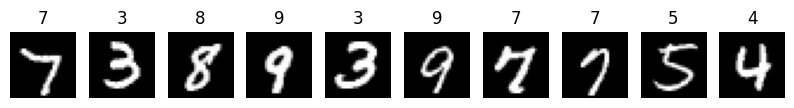

In [6]:
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(str(y_train[i]))
    plt.axis('off')
plt.show()

In [7]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One hot encoding the target class (labels)
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [8]:

model = keras.Sequential()
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))




In [9]:

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                loss=keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

In [12]:
history=model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=5, batch_size=64 , validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))

Epoch 1/5
938/938 [==============================] - 11s 12ms/step - loss: 0.1225 - accuracy: 0.9642 - val_loss: 0.1319 - val_accuracy: 0.9613
Epoch 2/5
938/938 [==============================] - 10s 10ms/step - loss: 0.1023 - accuracy: 0.9701 - val_loss: 0.2208 - val_accuracy: 0.9319
Epoch 3/5
938/938 [==============================] - 10s 10ms/step - loss: 0.0932 - accuracy: 0.9718 - val_loss: 0.0521 - val_accuracy: 0.9861
Epoch 4/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0838 - accuracy: 0.9756 - val_loss: 0.0464 - val_accuracy: 0.9860
Epoch 5/5
938/938 [==============================] - 11s 11ms/step - loss: 0.0770 - accuracy: 0.9771 - val_loss: 0.0472 - val_accuracy: 0.9864


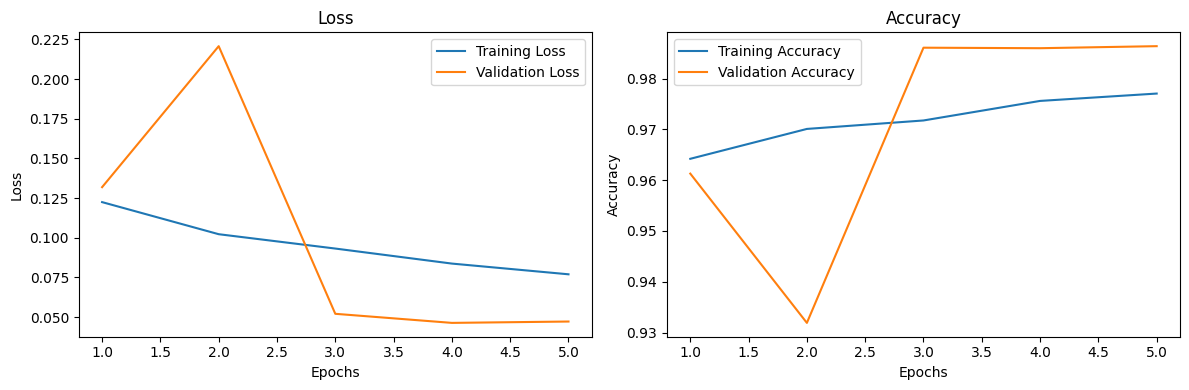

In [13]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the training and validation accuracy from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



In [14]:
def optimize_model(hp):
    model = keras.Sequential() #
    num_class=10

    for i in range(hp.Int('Conv_layer', 1, 5)):
        model.add(layers.Conv2D(
            filters=hp.Int('Filter' + str(i), 32, 256, step=32),
            kernel_size=hp.Choice('Kernel' + str(i), values=[3, 5]),
            activation='relu'
        ))

        beta=1
        if (i % 2 == beta):
            if hp.Choice('pooling_' + str(i), values=['max', 'avg']) == 'max':
                model.add(layers.MaxPooling2D())
            else:
                model.add(layers.AveragePooling2D())

            model.add(layers.Dropout(hp.Float('Dropout_1' + str(i), 0, 0., step=0.2)))

    model.add(layers.Flatten())


    for i in range(hp.Int('Dense_numbers', 1, 4)):
        model.add(layers.Dense(units=hp.Int('Units_numbers' + str(i), 32, 256, step=32), activation='relu'))
        model.add(layers.Dropout(hp.Float('Dropout_2' + str(i), 0, 0.7, step=0.1)))

    model.add(layers.Dense(num_class, activation='softmax'))


    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[0.001, 0.0001, 0.00001])
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [15]:
from keras_tuner.tuners import RandomSearch
tuner = RandomSearch(
    optimize_model,
    objective='val_accuracy',
    max_trials=5,
    directory='out_1',
    project_name='k_tuner'
)

In [21]:

x_train, x_test = x_train / 255.0, x_test / 255.0

In [25]:

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
history= tuner.search(x_train, y_train, epochs=10,batch_size=64, validation_data=(x_test, y_test))

Trial 5 Complete [00h 00m 01s]

Best val_accuracy So Far: 0.9330000281333923
Total elapsed time: 00h 09m 53s


In [26]:

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

{'Conv_layer': 1,
 'Filter0': 64,
 'Kernel0': 3,
 'Dense_numbers': 2,
 'Units_numbers0': 128,
 'Dropout_20': 0.4,
 'learning_rate': 0.0001,
 'Filter1': 224,
 'Kernel1': 5,
 'pooling_1': 'avg',
 'Dropout_11': 0.0,
 'Filter2': 128,
 'Kernel2': 3,
 'Filter3': 32,
 'Kernel3': 5,
 'pooling_3': 'avg',
 'Dropout_13': 0.0,
 'Filter4': 224,
 'Kernel4': 5,
 'Units_numbers1': 64,
 'Dropout_21': 0.5,
 'Units_numbers2': 192,
 'Dropout_22': 0.0,
 'Units_numbers3': 96,
 'Dropout_23': 0.6000000000000001}

In [29]:
best_model = tuner.get_best_models(1)[0]
best_model.build(input_shape=(None, 28, 28, 1))
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 flatten (Flatten)           (None, 43264)             0         
                                                                 
 dense (Dense)               (None, 128)               5537920   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                6